# Reference Material Runs and the Long Term Stability of XRF Spectrometers

#### The dry method of analyzing metals in laterite ores using X-ray fluorescence (XRF) is a common technique in the mining industry. To ensure the accuracy and reliability of the analysis results, quality control is an essential step in the process. In our lab, two reference materials are analyzed for every ten samples to serve as a benchmark for the accuracy and precision of the analysis. These reference materials are samples with known metal concentrations that have been previously analyzed by third-party laboratories.

#### This study was conducted from the data collected for the mining season of 2022. The study aimed to evaluate the performance of the quality control measures in place and to identify any potential sources of error in the analysis process as well as getting deeper insights on the process.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [110]:
df = pd.read_excel('data/crm.xlsx', parse_dates=['DT'])
df.columns =["sample","ni","fe","co","alu","sil","phos","sul","mag","cal","chrom","man","ti","dt","xrf"]
df = df.set_index('dt')

df['year'] = df.index.year
df['hour'] = df.index.hour
df['date'] = df.index.date
df['day_name'] = df.index.strftime('%A').str[:3]
df['month_year'] = df.index.to_period('M')

In [117]:
#subset and make a csv file for use in the 2023 QC Program
crm22 = df[df.month_year>"2022-06"].drop('year',axis=1)
crm22.to_csv('data/crm2022.csv')

## XRF Trends for each elements

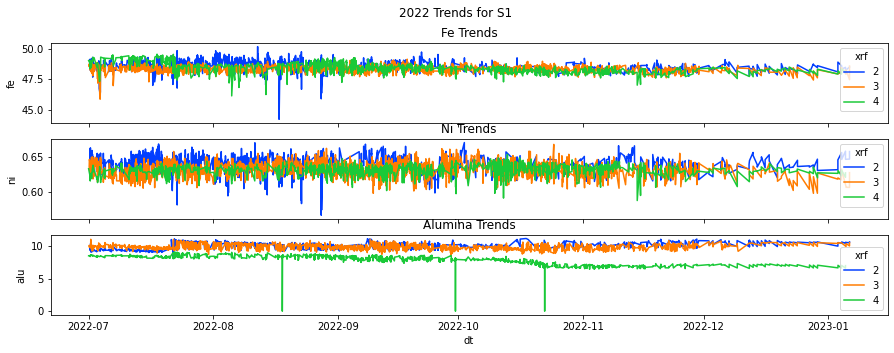

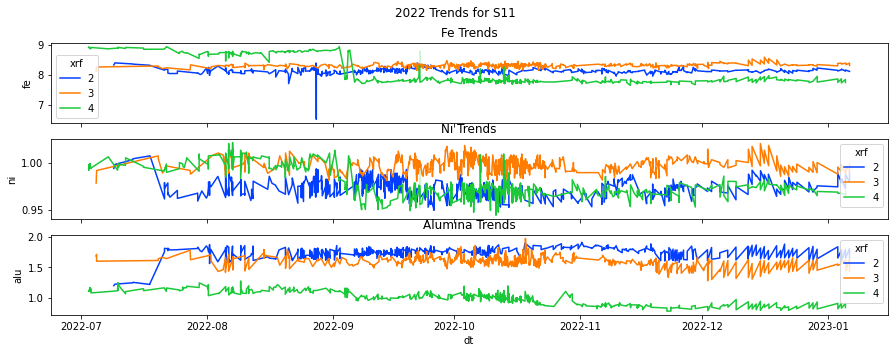

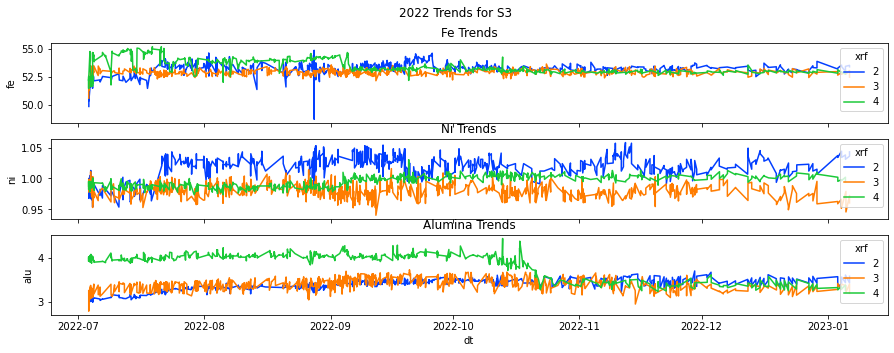

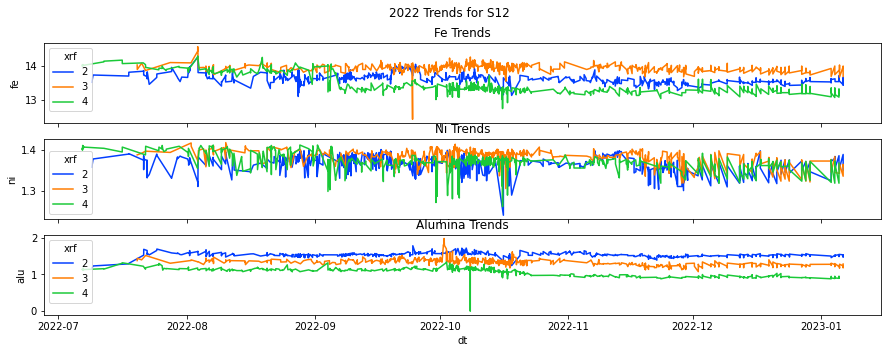

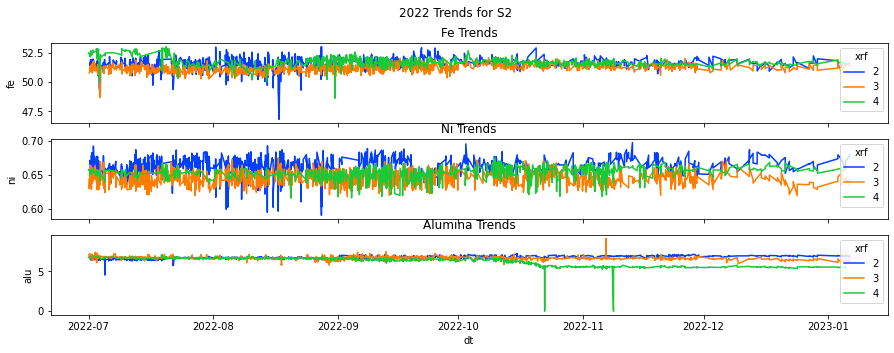

In [118]:
pellets = ['S1', 'S11', 'S3', 'S12', 'S2']
for i, pellet in enumerate(pellets):
    pellet =crm22[crm22['sample']== pellet].reset_index()
    fig, axes = plt.subplots(3,1, figsize=(15, 5), sharex=True)
    fig.suptitle('2022 Trends for ' + str(pellets[i]))

    sns.lineplot(ax=axes[0],x=pellet.dt, y=pellet.fe, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[0].set_title("Fe Trends")
    sns.lineplot(ax=axes[1],x=pellet.dt, y=pellet.ni, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[1].set_title("Ni Trends")
    sns.lineplot(ax=axes[2],x=pellet.dt, y=pellet.alu, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[2].set_title("Alumina Trends");

These are the plots of the CRM trends for the elements of interest.We can see that several instance of zero readings of alumina for XRF4 .Noticeable also is the drop in overall alumina reading from mid October 2022 , also in XRF4. 

## Daily Mean XRF Reading of Each CRM

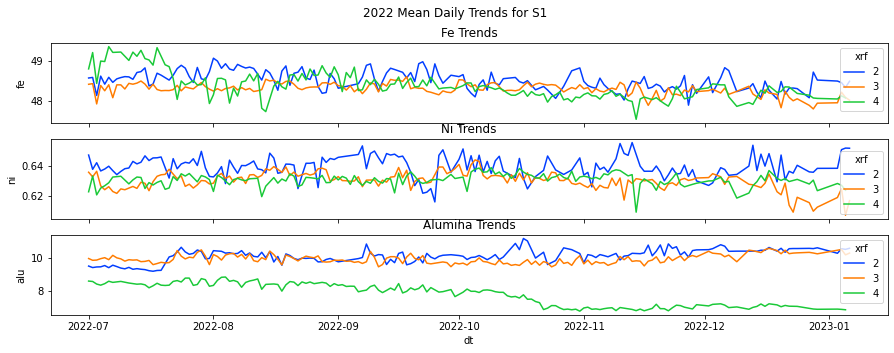

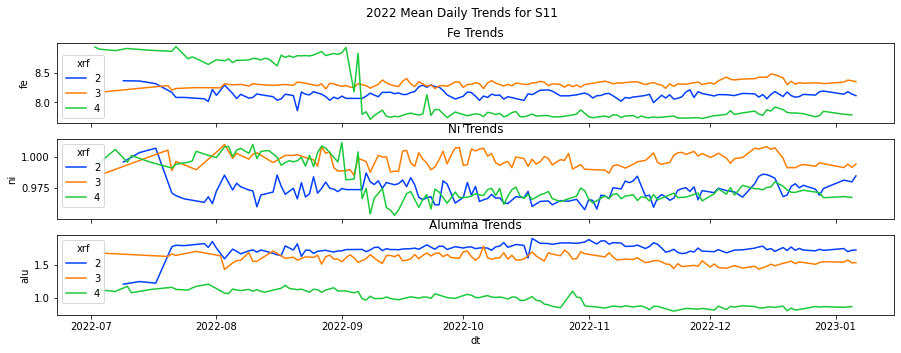

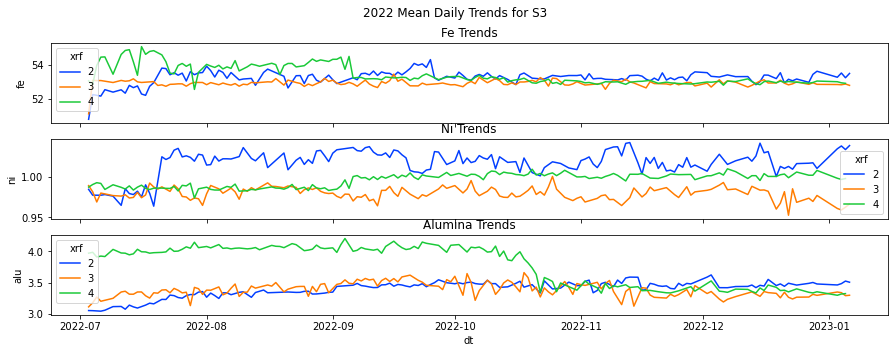

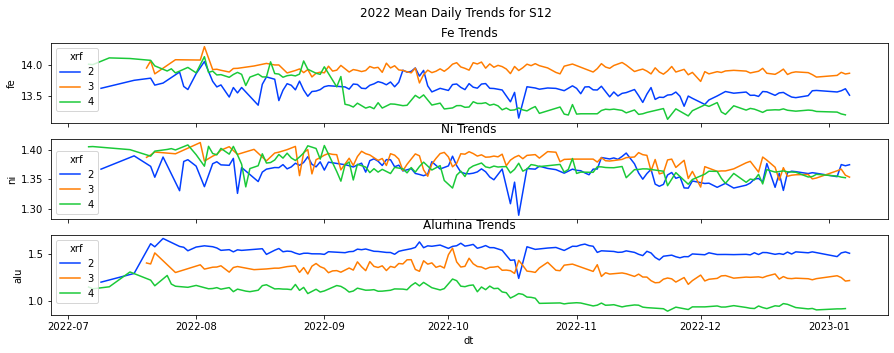

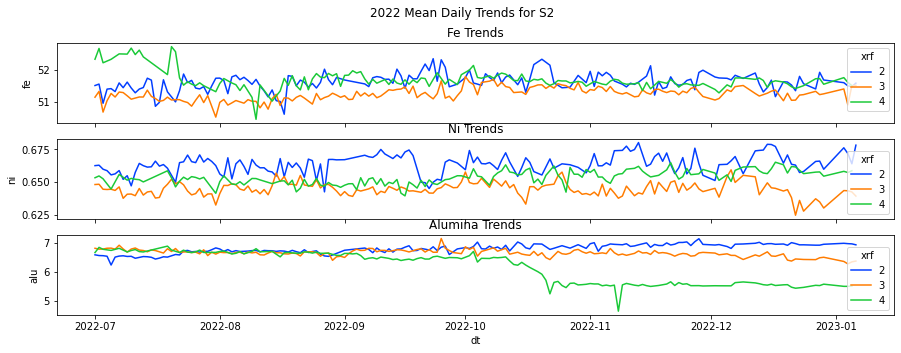

In [119]:
#The follwing plots would be summary of reading per day to clean the messy plots as we can see from above.
daily22=crm22.groupby(["xrf","sample"]).resample('D').mean().drop("xrf", axis=1).reset_index().dropna(thresh=6)

for i, pellet in enumerate(pellets):
    pellet =daily22[daily22['sample']== pellet].reset_index()
    fig, axes = plt.subplots(3,1, figsize=(15, 5), sharex=True)
    fig.suptitle('2022 Mean Daily Trends for ' + str(pellets[i]))

    sns.lineplot(ax=axes[0],x=pellet.dt, y=pellet.fe, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[0].set_title("Fe Trends")
    sns.lineplot(ax=axes[1],x=pellet.dt, y=pellet.ni, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[1].set_title("Ni Trends")
    sns.lineplot(ax=axes[2],x=pellet.dt, y=pellet.alu, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[2].set_title("Alumina Trends");

Several events can be observed:

    > A drop in Fe reading in XRF 4 for the low Fe CRMs in the first week of September which corresponds to the adjustments done by Technician
    > An overall decrease in Alumina reading in Mid-October for XRF 4.
    > A low point for all elements in Mid-October for XRF 2 but bounced back to older values later in the month.
    > XRF 3 appears to have consistent readings the whole time.
    

## Daily Standard Deviation of XRF Reading of Each CRM

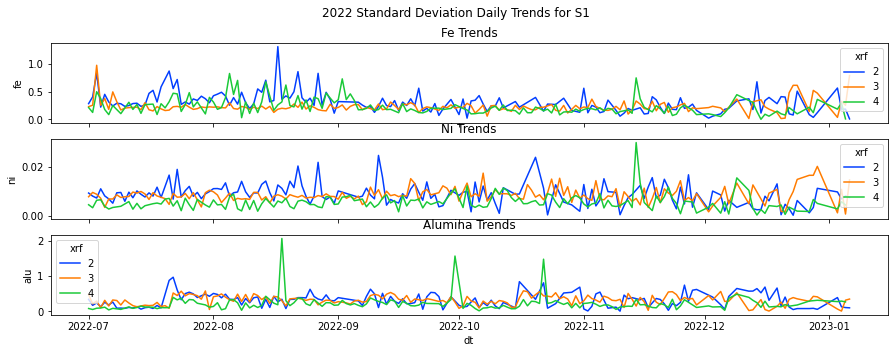

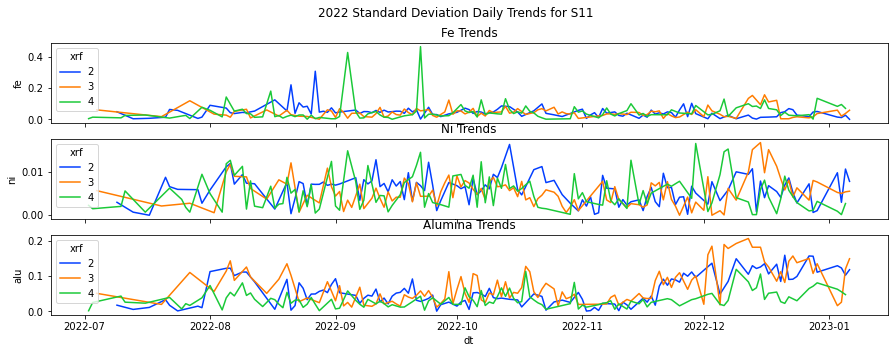

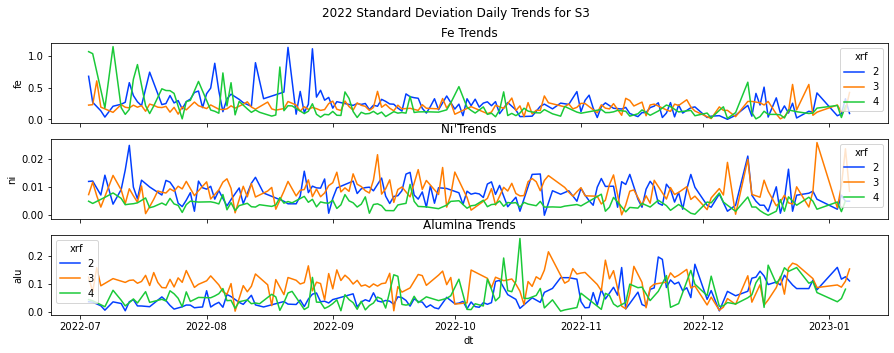

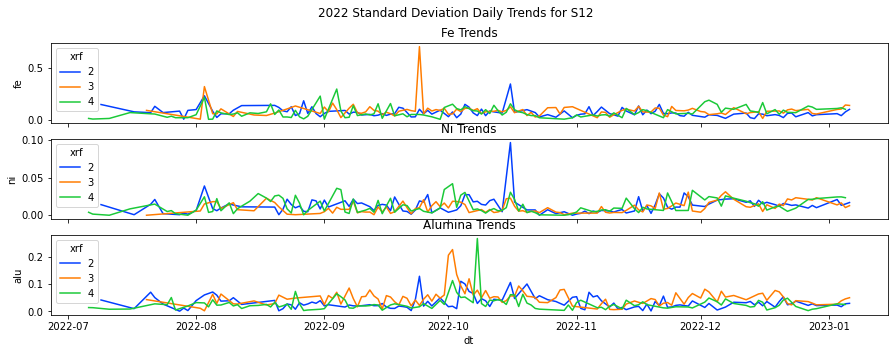

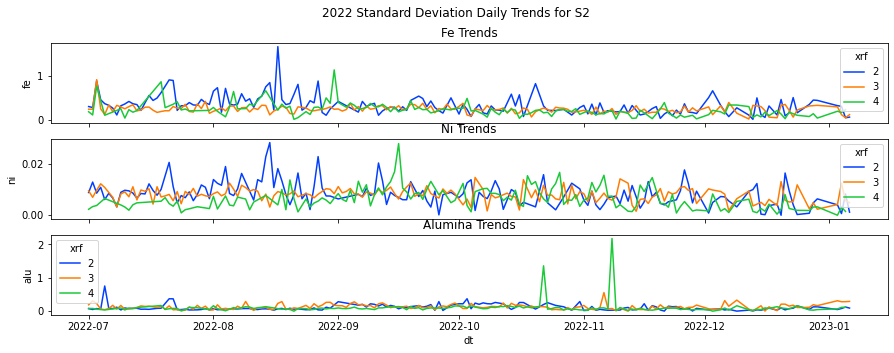

In [120]:
#resummarize the data above as Std Deviations to see daily fluctuations in XRF Readings
daily22_std=crm22.groupby(["xrf","sample"]).resample('D').std().drop("xrf", axis=1).reset_index().dropna(thresh=6)

for i, pellet in enumerate(pellets):
    pellet =daily22_std[daily22_std['sample']== pellet].reset_index()
    fig, axes = plt.subplots(3,1, figsize=(15, 5), sharex=True)
    fig.suptitle('2022 Standard Deviation Daily Trends for ' + str(pellets[i]))

    sns.lineplot(ax=axes[0],x=pellet.dt, y=pellet.fe, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[0].set_title("Fe Trends")
    sns.lineplot(ax=axes[1],x=pellet.dt, y=pellet.ni, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[1].set_title("Ni Trends")
    sns.lineplot(ax=axes[2],x=pellet.dt, y=pellet.alu, hue=pellet.xrf, palette='bright',lw=1.5,ls='-')
    axes[2].set_title("Alumina Trends");

Standard deviation measures how scattered the reading for each sample per XRF per day. 
Several spikes can in standard deviation is observablre with XRF 4,a matter which which made us be vigilant with XRF readings especially with alumina.
In mid-October, there must have been a happening in the condition of XRFs as spike in standard dev plot can also be observed with XRF 2 though XRF 3 is unaffected.

# 2022 CRM SUMMARY

In [9]:
#full data for 2022
df22 = df[df['year']==2022]
df22_new = df22.groupby(['hour','date'])['ni'].nunique()
df22_new = df22_new.reset_index(name='count')
df22_new.loc[df22_new['count']>18,'count'] = 18

## CRM Usage over Months

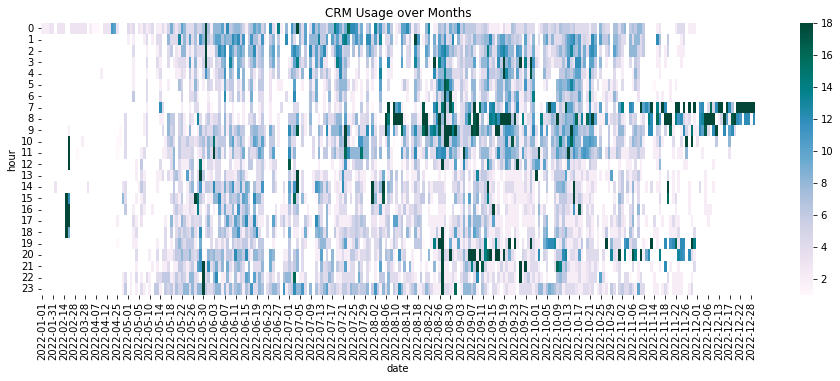

In [10]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_new.pivot('hour','date','count'),annot=False, cmap="PuBuGn")
plt.title('CRM Usage over Months');

Dark bands can be seen from about August to September for the periods of 7am-11am and 7pm-8pm which corresponds to the peak months in the mining season and to the peak hours when samples are received and also the start of the shifts, respectively.

## CRM Usage over Months reduced

In [172]:
df22_new = df22.groupby(['hour','date'])['ni'].nunique()
df22_new = df22_new.reset_index(name='count')
df22_new.loc[df22_new['count']>9,'count'] = 0 #exclude most instances of run requests using crm only

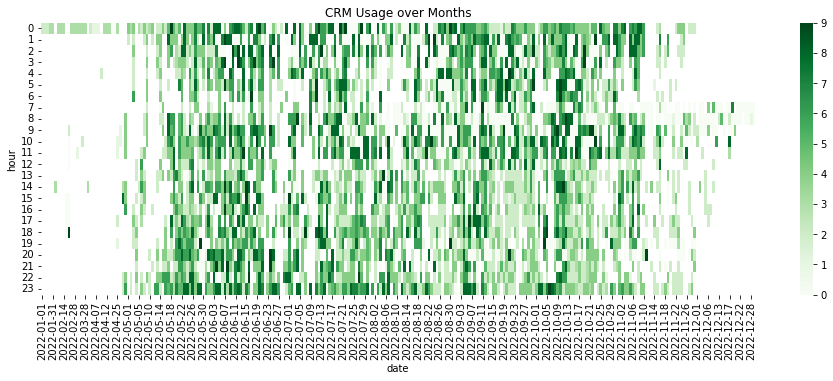

In [173]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_new.pivot('hour','date','count'),annot=False, cmap="Greens")
plt.title('CRM Usage over Months');

## XRF Usage over Months

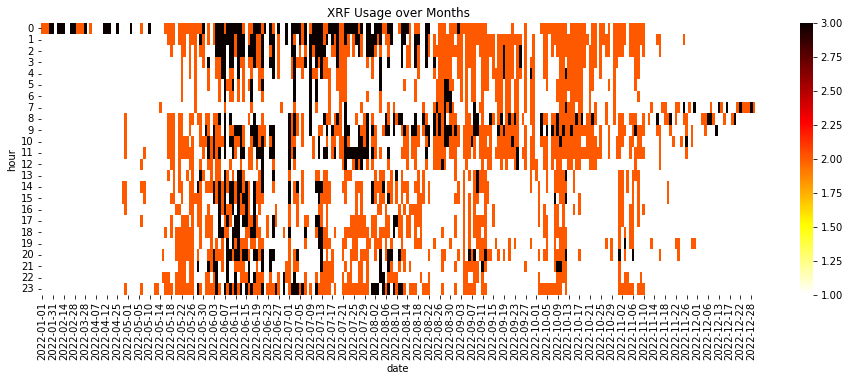

In [225]:
plt.figure(figsize=(16,5))
sns.heatmap(df22_xrf.pivot('hour','date','count'), cmap='hot_r')
plt.title('XRF Usage over Months');

## XRF Usage per Week by Hour

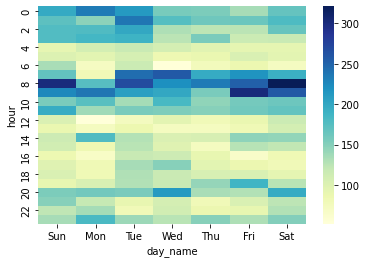

In [254]:
days_arr = ["Sun","Mon","Tue", "Wed", "Thu", "Fri", "Sat"]
df_heat = df22.groupby(['hour', 'day_name'])['xrf'].size().reset_index()
df_heat2 = df_heat.pivot('hour', 'day_name','xrf')
sns.heatmap(df_heat2[days_arr], cmap='YlGnBu');

## Runs by Hour

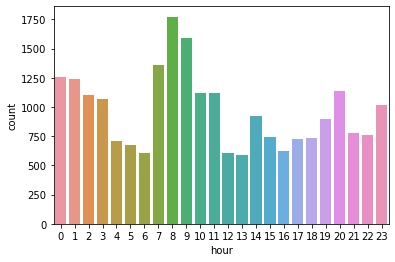

In [263]:
sns.countplot(x='hour', data=df22);

## Runs per Day

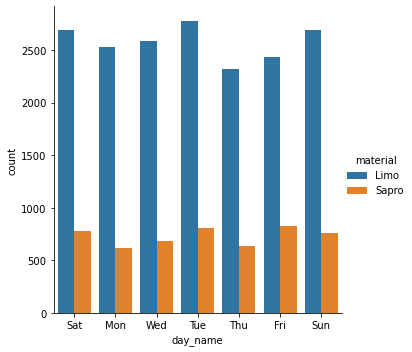

In [348]:
def material(x):
    if x > 40:
        return "Limo"
    return "Sapro"
df22['material'] = df22['fe'].apply(material)
sns.catplot(x='day_name', hue='material',data=df22, kind='count');

## Monthly CRM Runs

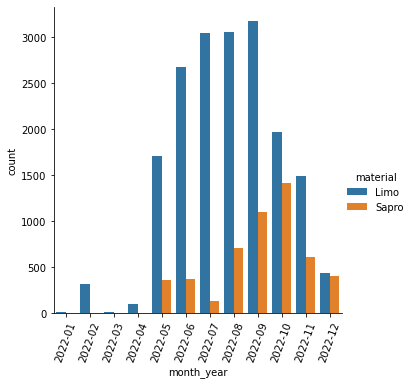

In [281]:
df22.sort_values(by=['month_year'], inplace=True)
sns.catplot(x='month_year', hue='material', data= df22, kind='count')
plt.xticks(rotation=70);

In [357]:
df['material'] = df['fe'].apply(material)
df_cat = df[(df['year']== 2022)].groupby(['xrf','sample',"hour",'day_name','material','month_year']).size().reset_index()

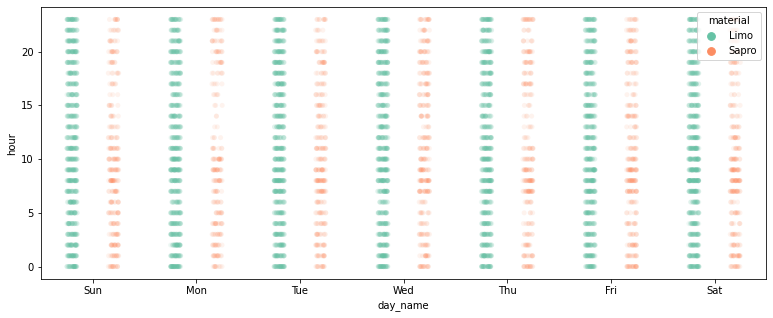

In [376]:
plt.figure(figsize=(13,5))
sns.stripplot(x='day_name', y='hour', hue='material',data=df_cat,jitter=True,dodge=True, palette='Set2', alpha=0.1, order=days_arr);

#### By analyzing the reference materials and comparing the results with the known metal concentrations, the study found that the quality control measures were effective in ensuring the accuracy and precision of the analysis. The results were within the acceptable limits, indicating that the analysis process was reliable and consistent.

Overall, the study highlights the importance of quality control in the dry method of analyzing metals in laterite ores using XRF. By using reference materials with known metal concentrations, the accuracy and precision of the analysis can be ensured, leading to reliable and consistent results.